In [1]:
import numpy as np

In [4]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [5]:
# 普通にアクセスするならこんな感じ
[x[3], x[7], x[4]]

[71, 86, 60]

In [6]:
# こっちの方がスマート
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [7]:
index配列の形状が適用される
ind = np.array([[3,7], [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [8]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row, col]

array([ 2,  5, 11])

In [10]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [12]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [13]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


## ランダムポイントの選択

In [14]:
mean = [0,0]
cov = [[1,2], [2,5]]

X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [15]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

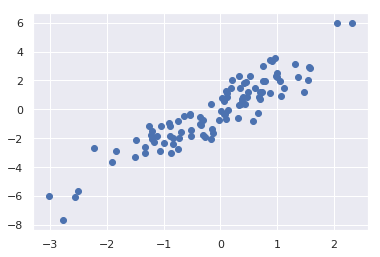

In [16]:
plt.scatter(X[:, 0], X[:, 1])

In [17]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([89, 94,  1,  8, 57, 50, 55, 51, 14, 25, 84, 62, 41,  5, 82, 42, 18,
       10, 24, 33])

In [18]:
selection = X[indices]
selection.shape

(20, 2)

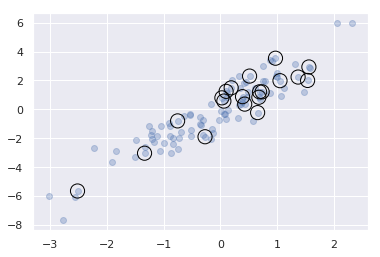

In [19]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200, edgecolors='black')

### ファンシーインデックスを用いた値の変更

In [20]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [21]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [22]:
x = np.zeros(10)
x[[0,0]] = [4,6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

### データのビニング

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

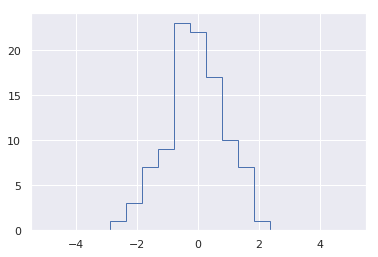

In [36]:
np.random.seed(42)
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)

np.add.at(counts, i, 1)

# plt.plot(bins, counts, linestyle='steps')
plt.hist(x, bins, counts, histtype='step')